### Radial/azimuthal data and save profiles for peak fitting.


version 1.2.0  October 9, 2021 JS

This script consists of 3 parts: 1) reading .pkl data. 2) cropping ROI,  3) saving profiles (004, equator)

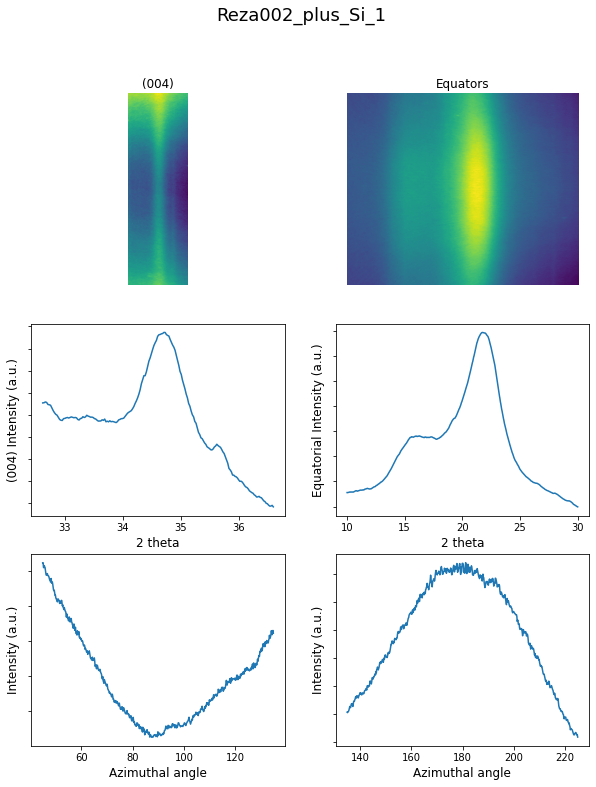

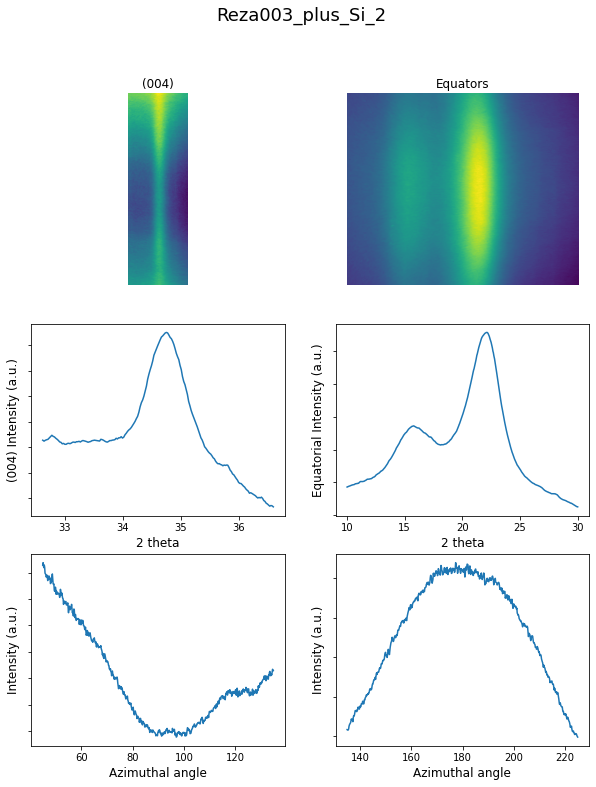

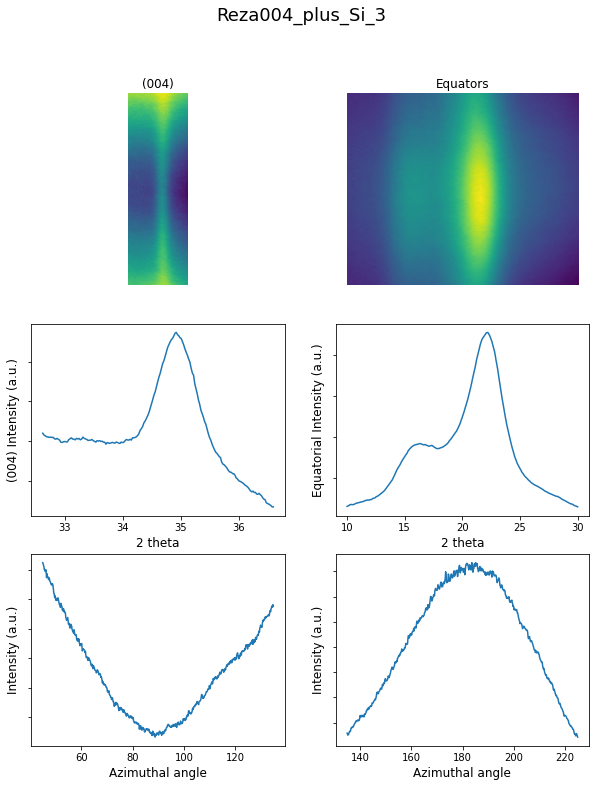

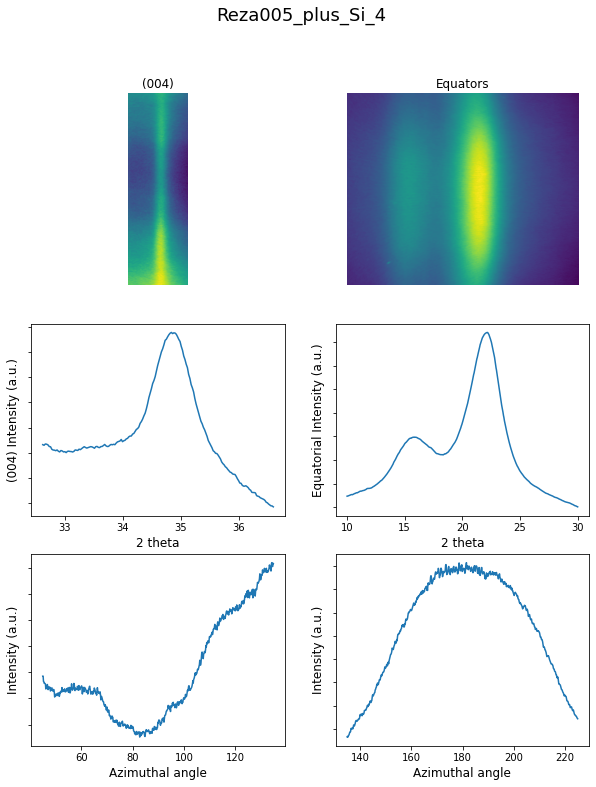

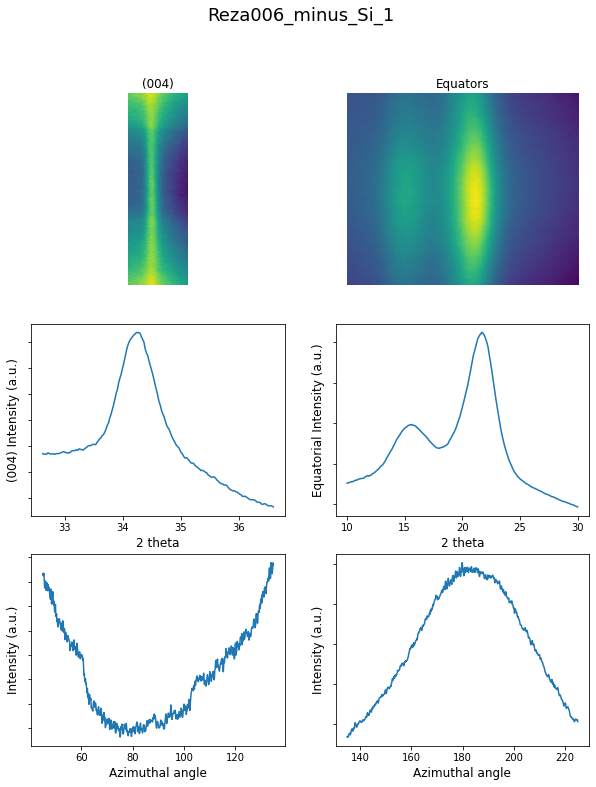

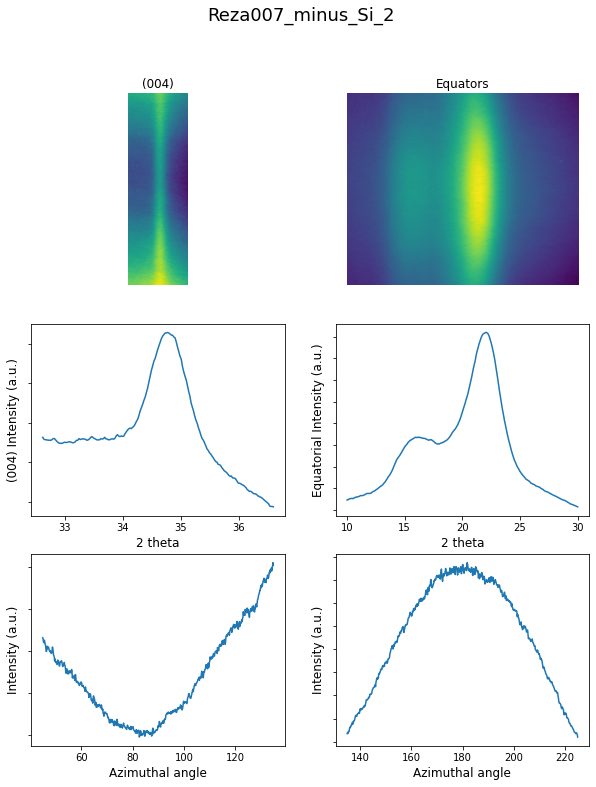

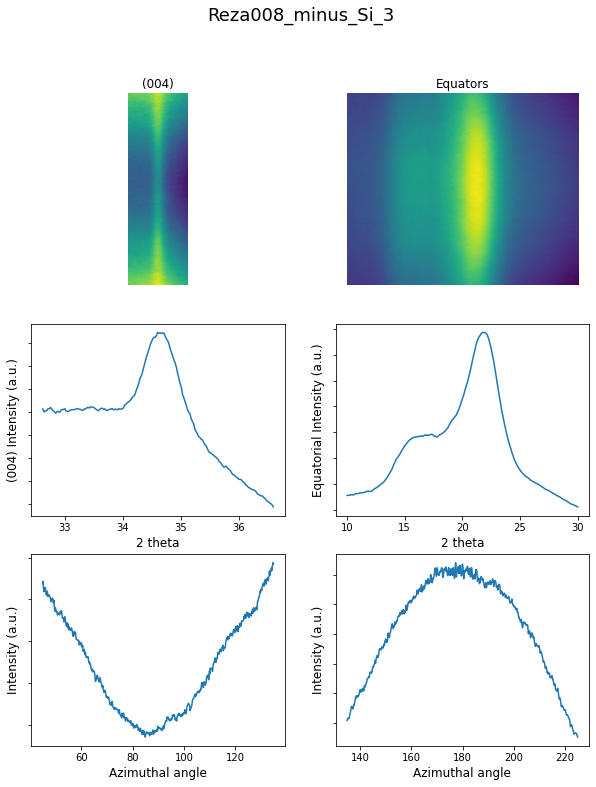

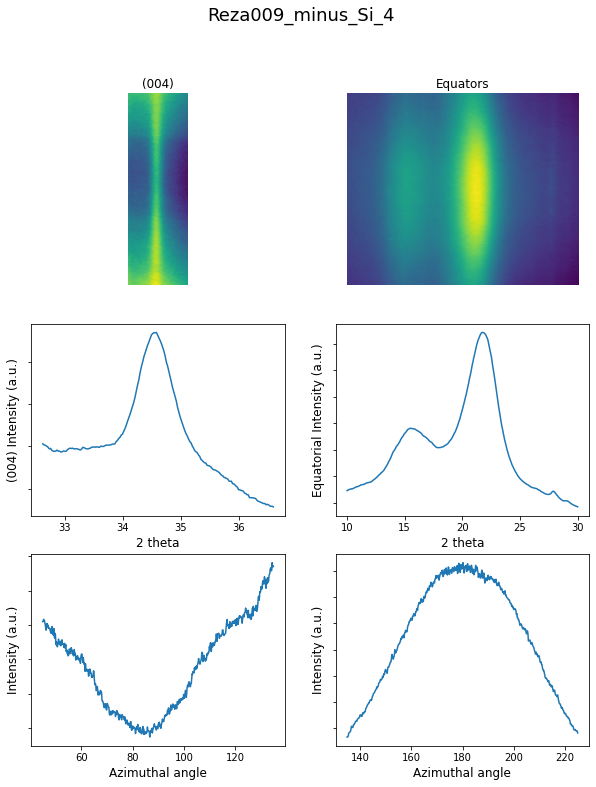

In [1]:
### XRAY_28_DES_2020
### vertical axis is converted to 2-theta axis by bilinear interpolation.
### then coverted to polar coordinate and save data as pandas table.

from common.xray import *
%matplotlib inline

my_data_path='Reza_1st'
XRAY=RigakuRapid2()
in_path,profile_path,image_path,figure_path,peakfit_path=XRAY.create_dir(my_data_path)
#
#
img_names=sorted([filename for filename in os.listdir(image_path) if filename.endswith('.npy')])


for i, fl_name in enumerate(img_names):
    fn=fl_name.split('.')[0]
    out=np.load(os.path.join(image_path,img_names[i])) # from image set data
    df_imgs = XRAY.profile(out[:,:,2]) # from polar image
    #img_004,df_004_radial,df_004_azimuth,img_eq,df_eq_radial,df_eq_azimuth=XRAY.me_eq(df_imgs) # extract profiles
    results=XRAY.me_eq(df_imgs)
    results[1].to_pickle(os.path.join(profile_path,fn+'_004_radial.pkl'))
    results[2].to_pickle(os.path.join(profile_path,fn+'_004_azimuth.pkl'))
    results[4].to_pickle(os.path.join(profile_path,fn+'_eq_radial.pkl'))
    results[5].to_pickle(os.path.join(profile_path,fn+'_eq_azimuth.pkl')) 
    
    
    # (004) and equator are extracted 
    fig, ax =plt.subplots(nrows=3,ncols=2, figsize=(10,12))
    fig.suptitle(fn, fontsize=18)

    for i,y in enumerate([0,3]):
        ax[0,i].imshow(np.sqrt(results[y]))
        ax[0,i].set_title(legends[y][0],fontsize=12)
        ax[0,i].axis("off")

    for i,y in enumerate([1,2,4,5]):
        p,q=divmod(i,2)
        ax[q+1,p].plot(results[y]) #radial profile (2 theta)
        ax[q+1,p].set_xlabel(legends[y][0],fontsize=12)
        ax[q+1,p].yaxis.set_ticklabels([])
        ax[q+1,p].set_ylabel(legends[y][1],fontsize=12)

    plt.savefig(os.path.join(figure_path,fn+'.jpg'),dpi=200)
    plt.show()
                              

End of program